In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary packages

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Lambda, Conv2DTranspose, concatenate, Flatten , Dense
from tensorflow.keras.models import Model , load_model , Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

import time

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
img_height = 128 #input height of the image for our model
img_width = 128 #input width of the image for our model
img_channel = 3 #input channel of the image of our model

In [ ]:
#define the input layer
inp = Input(shape = (img_width , img_height , img_channel))

##define the expansion blocks
#first block
c1 = Conv2D(filters = 16 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(inp)
c1 = Dropout(rate = 0.1)(c1)
c1 = Conv2D(filters = 16 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c1)
p1 = MaxPooling2D(pool_size = (2 , 2))(c1)

#second block
c2 = Conv2D(filters = 32 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(p1)
c2 = Dropout(rate = 0.1)(c2)
c2 = Conv2D(filters = 32 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c2)
p2 = MaxPooling2D(pool_size = (2 , 2))(c2)

#third block
c3 = Conv2D(filters = 64 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(p2)
c3 = Dropout(rate = 0.1)(c3)
c3 = Conv2D(filters = 64 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c3)
p3 = MaxPooling2D(pool_size = (2 , 2))(c3)

#fourth block
c4 = Conv2D(filters = 128 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(p3)
c4 = Dropout(rate = 0.1)(c4)
c4 = Conv2D(filters = 128 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c4)
p4 = MaxPooling2D(pool_size = (2 , 2))(c4)

#fifth block
c5 = Conv2D(filters = 256 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(p4)
c5 = Dropout(rate = 0.1)(c5)
c5 = Conv2D(filters = 256 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c5)

##define the contraction blocks
#sixth block
u6 = Conv2DTranspose(filters = 128 , kernel_size = (2 , 2),
                    strides = (2 , 2) , padding = 'same')(c5)
u6 = concatenate([u6 , c4])
c6 = Conv2D(filters = 128 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(u6)
c6 = Dropout(rate = 0.1)(c6)
c6 = Conv2D(filters = 128 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c6)

#seventh block
u7 = Conv2DTranspose(filters = 64 , kernel_size = (2 , 2),
                    strides = (2 , 2) , padding = 'same')(c6)
u7 = concatenate([u7 , c3])
c7 = Conv2D(filters = 64 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(u7)
c7 = Dropout(rate = 0.1)(c7)
c7 = Conv2D(filters = 64 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c7)

#eighth block
u8 = Conv2DTranspose(filters = 32 , kernel_size = (2 , 2),
                    strides = (2 , 2) , padding = 'same')(c7)
u8 = concatenate([u8 , c2])
c8 = Conv2D(filters = 32 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(u8)
c8 = Dropout(rate = 0.1)(c8)
c8 = Conv2D(filters = 32 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c8)

#ninth block
u9 = Conv2DTranspose(filters = 16 , kernel_size = (2 , 2),
                    strides = (2 , 2) , padding = 'same')(c8)
u9 = concatenate([u9 , c1] , axis = 3)
c9 = Conv2D(filters = 16 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(u9)
c9 = Dropout(rate = 0.1)(c9)
c9 = Conv2D(filters = 16 , kernel_size = (3 , 3) , 
            padding = 'same' , activation = 'relu' , 
            kernel_initializer = 'he_normal')(c9)

#defining the final output
flatten = Flatten()(c9)
out = Dense(units = 98 , activation = 'softmax')(flatten)

#setting the model
model = Model(inputs = [inp] , outputs = [out])

#compiling the model
model.compile(optimizer = 'adam' ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#getting the summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
#setting the training directory
train_dir = '/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects_03.01.2022' 

#setting the validation directory
val_dir = '/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid'

#Adding in rescale preprocessing
train_gen = ImageDataGenerator(rescale = 1./255) 
val_gen = ImageDataGenerator(rescale = 1./255)

#setting in the generator and import batches of images from the directory
train_generator = train_gen.flow_from_directory(train_dir,
                                               target_size = (128 , 128),
                                               batch_size = 12,
                                               class_mode = 'categorical')
validation_generator = val_gen.flow_from_directory(val_dir,
                                                  target_size = (128 , 128),
                                                  batch_size = 10,
                                                  class_mode = 'categorical')

Found 400 images belonging to 98 classes.
Found 178 images belonging to 98 classes.


In [ ]:
#Begining the training of our model
history = model.fit_generator(train_generator,
                             steps_per_epoch = 10,
                             epochs = 200,
                             validation_data = validation_generator,
                             validation_steps = 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
10/10 [==============================] - 121s 12s/step - loss: 76.5774 - accuracy: 0.0357 - val_loss: 7.7026 - val_accuracy: 0.0000e+00
Epoch 2/200
10/10 [==============================] - 92s 9s/step - loss: 5.3916 - accuracy: 0.0500 - val_loss: 4.5571 - val_accuracy: 0.0000e+00
Epoch 3/200
10/10 [==============================] - 70s 7s/step - loss: 4.1070 - accuracy: 0.0667 - val_loss: 4.5744 - val_accuracy: 0.0000e+00
Epoch 4/200
10/10 [==============================] - 54s 6s/step - loss: 4.0159 - accuracy: 0.1161 - val_loss: 4.5144 - val_accuracy: 0.0500
Epoch 5/200
10/10 [==============================] - 43s 4s/step - loss: 4.1354 - accuracy: 0.0893 - val_loss: 4.8112 - val_accuracy: 0.0250
Epoch 6/200
10/10 [==============================] - 34s 4s/step - loss: 4.0153 - accuracy: 0.1333 - val_loss: 4.5420 - val_accuracy: 0.0500
Epoch 7/200
10/10 [==============================] - 25s 3s/step - loss: 4.0326 - accuracy: 0.1000 - val_loss: 4.8075 - val_accuracy: 0.025

In [ ]:
model.save('weld_defect_classification.h5') #saving in h5 format

In [ ]:
model.save('weld_defect_classification') #saving in normal format

INFO:tensorflow:Assets written to: weld_defect_classification/assets


In [ ]:
weld_model = load_model('weld_defect_classification.h5') #for testing purpose loading the model

In [ ]:
class_dict = train_generator.class_indices
indices_to_classes = {x : y for y,x in class_dict.items() }
indices_to_classes

{0: 'Blow hole',
 1: 'Blow hole & Piping',
 2: 'Blow hole & inclusion',
 3: 'Blow hole & porosities',
 4: 'Blow hole & valley',
 5: 'Blow hole & worm hole',
 6: 'Blow hole, incluison & piping',
 7: 'Blow hole, inclusion & porosity',
 8: 'Blow hole, piping & valley',
 9: 'Blow hole, piping, Porosities & valley',
 10: 'Blow hole, piping, porosities & worm hole',
 11: 'Blow hole, porosities & inclusion',
 12: 'Burn through',
 13: 'Cavity & inclusion',
 14: 'Cluster and scattered porosities',
 15: 'Cluster of porosities',
 16: 'Cluster of porosities & blow hole',
 17: 'Cluster of porosities & notch mark',
 18: 'Cluster of porosities, LOF and slag inclusion',
 19: 'Cluster of porosities, Worm holes',
 20: 'Cluster of worm holes, blow hole, porosities & inclusion',
 21: 'Deep notch mark & piping',
 22: 'Deep notch mark, LOF, inclusion',
 23: 'Deep notch mark, inclusion & piping',
 24: 'Elongated pore & porosities',
 25: 'Elongated pore & valley',
 26: 'Elongated pore & worm hole',
 27: 'Film

In [ ]:
hist_df = pd.DataFrame(history.history) #creating the history dataframe
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,76.577354,0.035714,7.702570,0.000
1,5.391620,0.050000,4.557107,0.000
2,4.107046,0.066667,4.574386,0.000
3,4.015928,0.116071,4.514354,0.050
4,4.135425,0.089286,4.811207,0.025


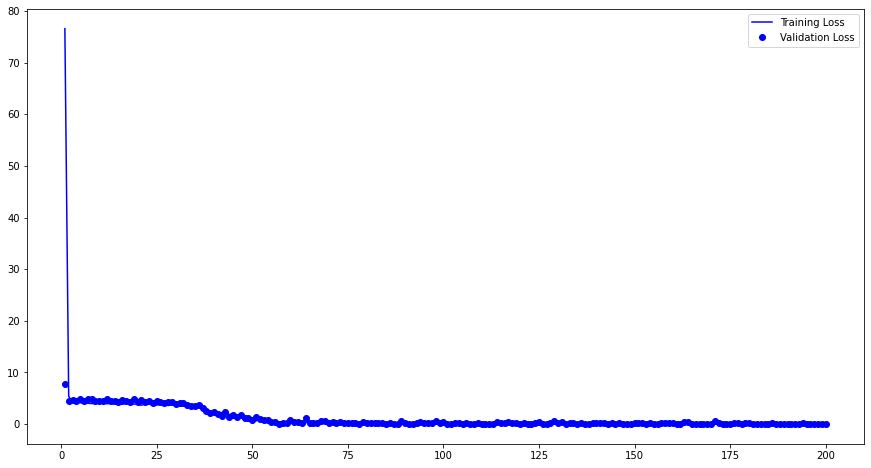

In [ ]:
#Plotting the loss curve

loss = hist_df["loss"]
val_loss = hist_df["val_loss"]

epochs = range(1 , len(loss)+1)

plt.figure(figsize = (15, 8))
plt.plot(epochs , loss , 'b' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'bo' , label = 'Validation Loss')
plt.legend()
plt.show()

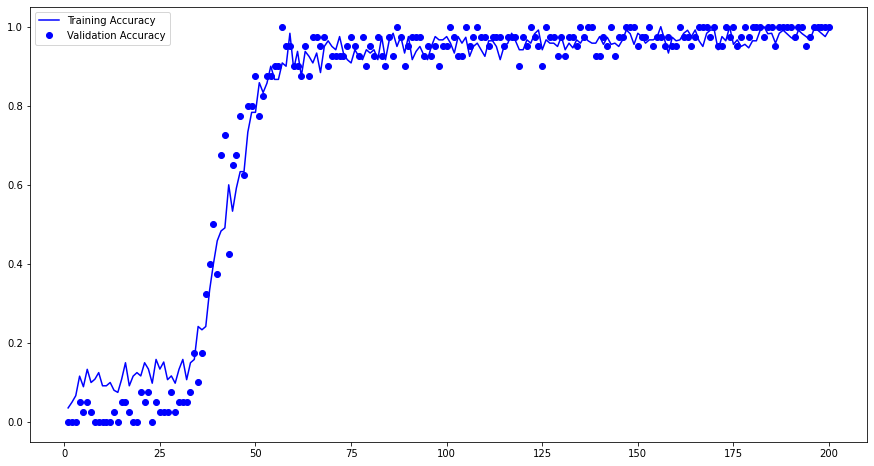

In [ ]:
#Plotting the accuracy curve

acc = hist_df["accuracy"]
val_acc = hist_df["val_accuracy"]

epochs = range(1 , len(loss)+1)

plt.figure(figsize = (15, 8))
plt.plot(epochs , acc , 'b' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'bo' , label = 'Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
def prediction(path):
    img = cv2.imread(path)
    shrunked_img = cv2.resize(img , (128 , 128)  , interpolation = cv2.INTER_AREA)
    img_arr = img_to_array(shrunked_img)
    img_arr = img_arr / 255
    plt.imshow(img_arr)
    img_arr = img_arr.reshape(1 , img_arr.shape[0] , img_arr.shape[1] , img_arr.shape[2])
    weld_model = load_model('weld_defect_classification.h5')
    teeth_prediction = weld_model.predict(img_arr)
    class_ind = np.argmax(teeth_prediction)
    class_label = indices_to_classes[class_ind]
    print(class_label)

Blow hole
2.0984926223754883


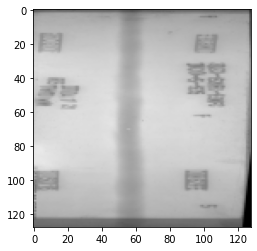

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole/3023 - E2KFC + E3KFC - S35 - DK 30 - S - 04.11.2021.dcm.png')
print(time.time() - t)

Blow hole & Piping
1.4241056442260742


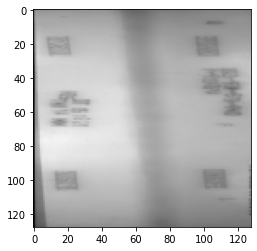

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole & Piping/3023 - FIN STAB - F - P - P23A - P14 - 15.12.2021.dcm.png')
print(time.time() - t)

Blow hole & inclusion
1.7421391010284424


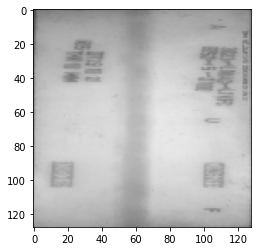

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole & inclusion/3023 - L1KAC + L1KFC - J100 - BISJ - S - 29.10.2021.dcm.png')
print(time.time() - t)

Blow hole & porosities
1.5639684200286865


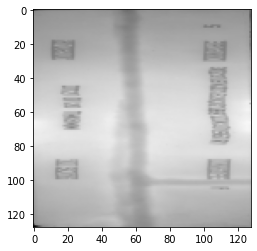

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole & porosities/3022 - E1KJC + E2KJC - S 67R1 - DK20 - 21.01.2020.dcm.png')
print(time.time() - t)

LOF & inclusion
1.2841010093688965


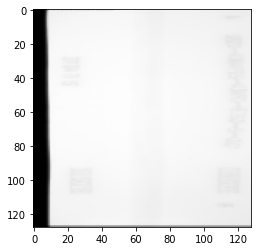

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole & valley/3022 - A3KAPS + A3KFC - J 47 - BISJ-S-04.11.19.dcm.png')
print(time.time() - t)

Blow hole, inclusion & porosity
1.359827995300293


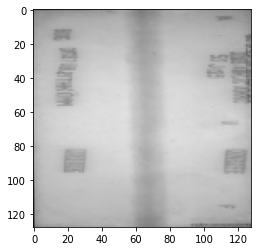

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole, inclusion & porosity/3023 - A1KJC + A1KKC - J125 - SS - 27.08.2021.dcm.png')
print(time.time() - t)

Blow hole, piping, porosities & worm hole
1.3210399150848389


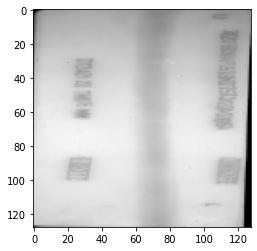

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole, piping, porosities & worm hole/3022 - B2KAPS - J120 A - J106A - BHD - S - 24.01.2020.dcm.png')
print(time.time() - t)

Blow hole, porosities & inclusion
1.3809964656829834


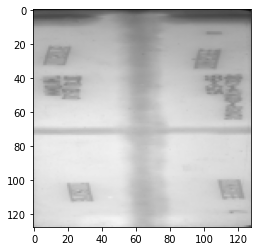

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Blow hole, porosities & inclusion/3022 - A1KJC + B2KJC - S25- SS - 05.09.2020.dcm.png')
print(time.time() - t)

Burn through
1.3179888725280762


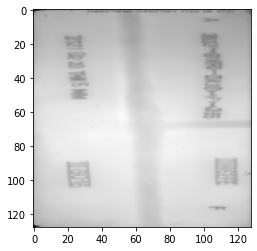

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Burn through/3022 - B1KFC - J 55 - DK30 - P - 21.02.2020.dcm.png')
print(time.time() - t)

Cluster of porosities, LOF and slag inclusion
1.4093010425567627


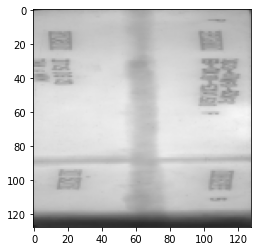

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Cluster of porosities, LOF and slag inclusion/3022 - B1KFC + B2KFC - S31A - S20 - DK30 - S - 29.09.2020.dcm.png')
print(time.time() - t)

Cluster of porosities, Worm holes
1.5331315994262695


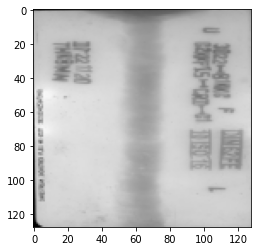

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Cluster of porosities, Worm holes/3022 - B1KKC + C2KKPS - C1 - GDR - C - 22.11.2020.dcm.png')
print(time.time() - t)

Cluster of worm holes, blow hole, porosities & inclusion
1.3288183212280273


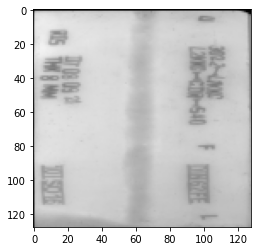

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Cluster of worm holes, blow hole, porosities & inclusion/3022 - L1KKC + L2KKC - S40 - GDR - 08.09.2021.dcm.png')
print(time.time() - t)

Deep notch mark & piping
1.4088859558105469


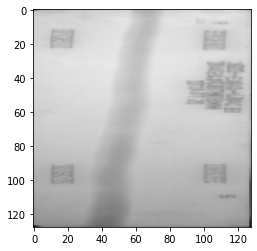

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Deep notch mark & piping/3022 - E3KAC + L1KAC - S43 A - S17 - DK40 - 24.07.2020.dcm.png')
print(time.time() - t)

Deep notch mark, LOF, inclusion
1.4029972553253174


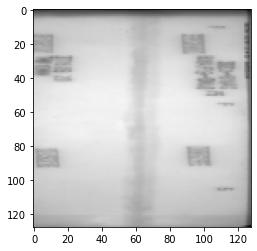

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Deep notch mark, LOF, inclusion/3022 - B1KAC + B2KAPS - P9 - DK-40 - P - 18.09.2020.dcm.png')
print(time.time() - t)

Deep notch mark, inclusion & piping
1.4188048839569092


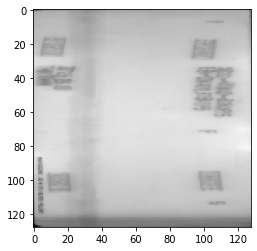

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Deep notch mark, inclusion & piping/3022 - B1KAC + B2KAPS - P29A - P9- DK40- P - 29.09.2020.dcm.png')
print(time.time() - t)

Elongated pore & porosities
1.2705154418945312


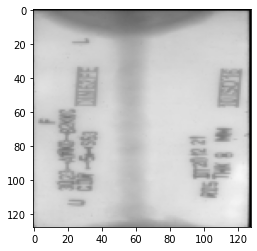

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Elongated pore & porosities/3023 - A1KKC + B2KKC - S63- GDR - S - 20.12.2021.dcm.png')
print(time.time() - t)

Elongated pore & valley
1.3850176334381104


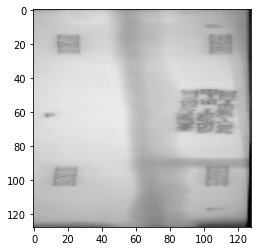

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Elongated pore & valley/3022 - E3KFC + L1KFC - S 44A - S24 - SS - 17.03.2020.dcm.png')
print(time.time() - t)

Elongated pore & worm hole
1.438276767730713


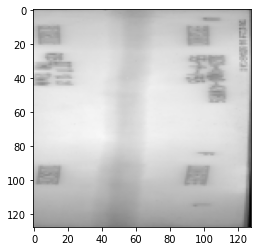

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Elongated pore & worm hole/3023 - A1KKC + A2KKPS - P55 - SS - P - RIS -11.12.2021.dcm.png')
print(time.time() - t)

Film mark & inclusion
1.375899314880371


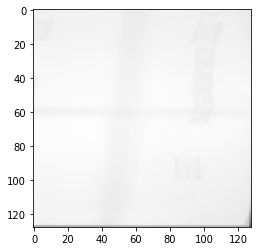

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Film mark & inclusion/3022 - A3KFC + E1KFC - P 56 A - SS - P - 08.12.2019.dcm.png')
print(time.time() - t)

Improper Image
1.415137767791748


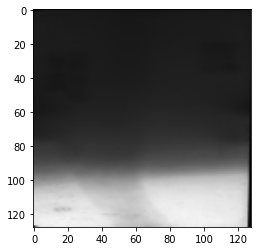

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Improper Image/3022 - B1KAC + C2KAC - S32 -  A - B - EB - BS - 22.11.2020.dcm.png')
print(time.time() - t)

Inclusion & Worm holes
1.5036265850067139


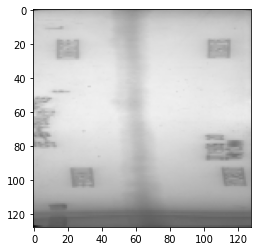

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion & Worm holes/3022 - A1KFC + A2KFPS - P28A - P21 - SS - P - 19.09.2020.dcm.png')
print(time.time() - t)

Inclusion & piping
1.4865522384643555


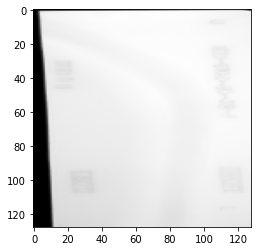

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion & piping/3022 - B1KAC - J 18 - BS-P-03.11.19.dcm.png')
print(time.time() - t)

Inclusion & porosity
1.448493480682373


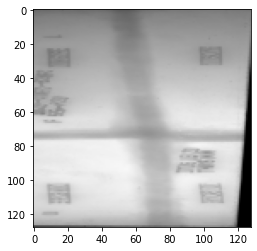

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion & porosity/3022 - A1KFC + B2KFC - P20 - SS - 05.09.2020.dcm.png')
print(time.time() - t)

Inclusion & surface mark
1.3233654499053955


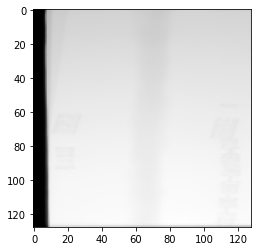

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion & surface mark/3022 - A3KFC + E1KFC - P 53 - SS -P - 13.11.2019.dcm.png')
print(time.time() - t)

Inclusion & valley
1.4716167449951172


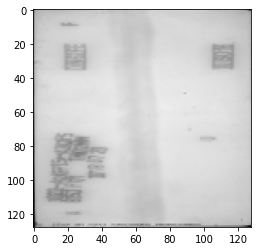

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion & valley/3022 - A2KFPS + A2KJPS - J171 - P - BISJ - 18.07.2020.dcm.png')
print(time.time() - t)

Inclusion, porosities & worm holes
1.4115831851959229


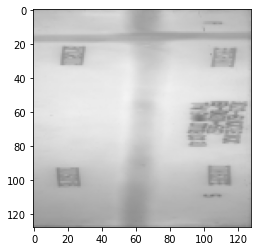

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion, porosities & worm holes/3022 - E2KJC + E3KJC - S 62 - DK20 - 08.03.2020_Sunday.dcm.png')
print(time.time() - t)

Inclusion, porosity & U-C
1.352966070175171


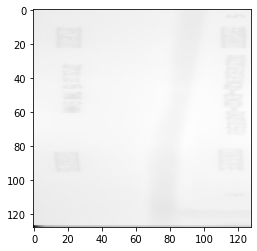

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion, porosity & U-C/3022 - E1KJC + E2KJC - S 68 - EB -DK20 - 22.12.2019.dcm.png')
print(time.time() - t)

LOF & inclusion
1.4842634201049805


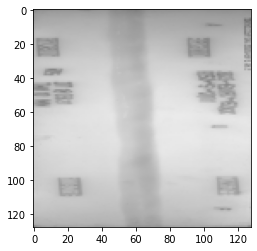

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion, porosity & valley/3023 - E2KFC + E2KJC - J101 - BISJ - S - 18.09.2021.dcm.png')
print(time.time() - t)

Inclusion, suface mark & valley
1.291428565979004


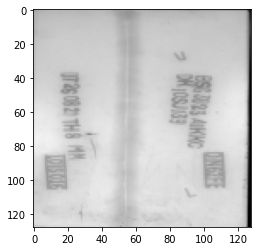

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Inclusion, suface mark & valley/3023 - A1KKC - J139 - DK - P - 26.08.2021.dcm.png')
print(time.time() - t)

LOF
1.3168888092041016


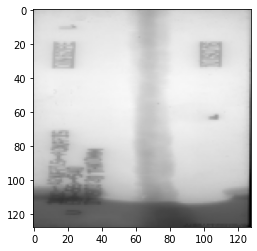

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF/3022 -  A2KFPS + A3KFPS - S40 - SS - S - 15.03.2020.dcm.png')
print(time.time() - t)

LOF & blow hole
1.3854186534881592


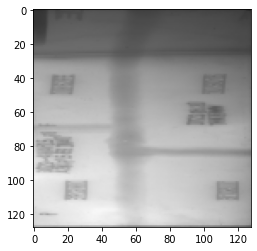

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF & blow hole/3022 - A1KAPS + A2KAPS - P3 - DK40 - P - 23.08.2020.dcm.png')
print(time.time() - t)

LOF & inclusion
1.7891981601715088


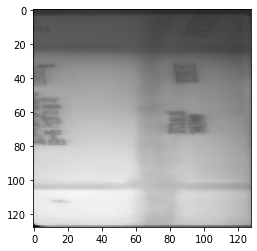

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF & inclusion/3022 - A1KAPS + A2KAPS - P12 - BS - S - 23.08.2020.dcm.png')
print(time.time() - t)

Inclusion & Worm holes
1.274991750717163


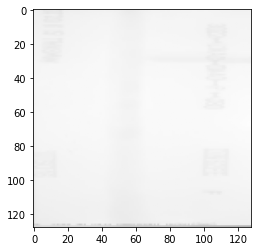

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF & piping/3023 - A1KKC - J166 R2 - GDR - S - RIS- 30.11.2021.dcm.png')
print(time.time() - t)

LOF & piping
1.4197640419006348


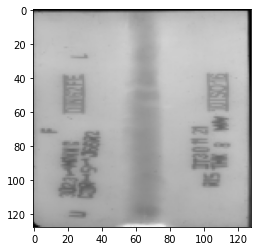

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF & piping/3023 - A1KKC - J166 R2 - GDR - S - RIS- 30.11.2021.dcm.png')
print(time.time() - t)

LOF & inclusion
1.4089617729187012


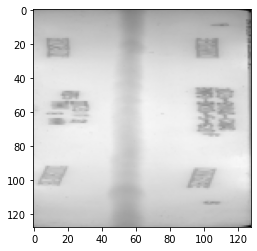

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF & surface mark/3023 - C2KAC + B1KAC + B1KFC - S20 - DK30 - S - 23.11.21.dcm.png')
print(time.time() - t)

LOF, Inclusion, cluster of porosities
1.3142929077148438


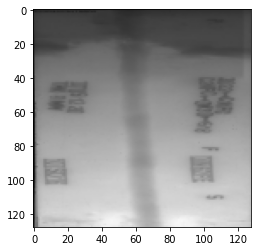

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, Inclusion, cluster of porosities/3022 - G1KFC + G2KFC - S18 - DK30 - 09.12.2020.dcm.png')
print(time.time() - t)

Cluster of porosities
1.428096055984497


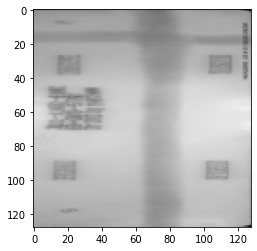

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, blow hole & cluster of porosities/3022 - A3KKC + E1KKC - S 77R1 - DK10 - EB - 13.03.2020.dcm.png')
print(time.time() - t)

LOF, blow hole & worm hole
1.5917680263519287


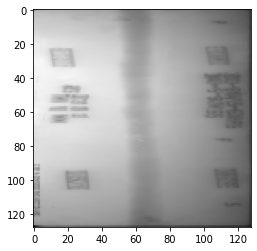

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, blow hole & worm hole/3023 - E1KAPS + E2KAPS - S47A - S19 - DK40 - S - 21.10.2021.dcm.png')
print(time.time() - t)

LOF, blow hole, inclusion, porosities
1.3477504253387451


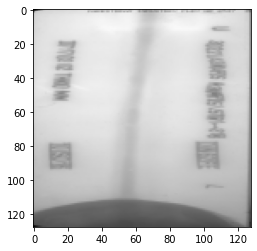

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, blow hole, inclusion, porosities/3022 - A2KAPS + A3KAPS - S18- Str. 1 - EB - 17.02.2020.dcm.png')
print(time.time() - t)

LOF, blow hole, piping & porosities
1.4038102626800537


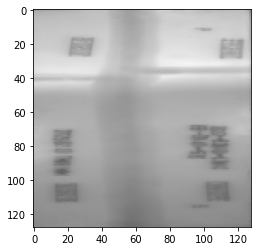

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, blow hole, piping & porosities/3022 - E3KAC + L1KAC - S16 - DK40 - 24.02.2020.dcm.png')
print(time.time() - t)

LOF, blow hole, porosity & valley
1.350266456604004


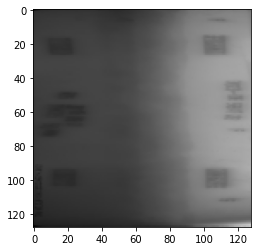

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, blow hole, porosity & valley/3023 - DE SEAT - J3  - 18.09.2021.dcm.png')
print(time.time() - t)

LOF, incluison & worm hole
1.3188471794128418


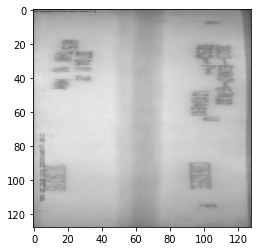

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, incluison & worm hole/3023 - E2KKC + E2KJC - J104 EXTN 1 - BISJ - P - 04.11.2021.dcm.png')
print(time.time() - t)

LOF, inclusion & porosities
1.3877177238464355


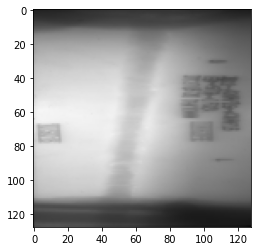

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, inclusion & porosities/3022 - A2KAPS + A3KAPS - P 32A- Str. 1 - EB - 27.06.2020.dcm.png')
print(time.time() - t)

LOF, inclusion & valley
1.3670735359191895


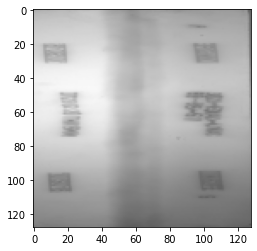

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, inclusion & valley/3022 - E3KAC + L1KAC - S11 - BS - 23.02.2020_Sunday.dcm.png')
print(time.time() - t)

LOF, inclusion, porosities & burn through
1.3314239978790283


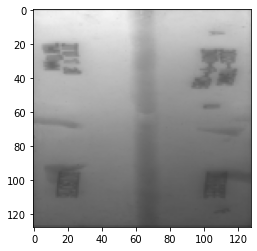

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, inclusion, porosities & burn through/3022 - T6KRC - J89 - DK01 - P  - 01.11.2020.dcm.png')
print(time.time() - t)

LOF, inclusion, porosity & blow hole
1.6799962520599365


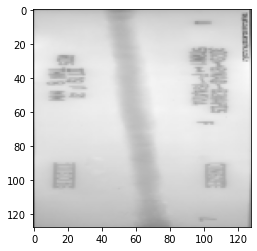

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, inclusion, porosity & blow hole/3023 - B1KAC + B2KAPS - P24A - P14 - STRN 1 - P - 19.11.2021.dcm.png')
print(time.time() - t)

LOF, inclusion, valley & worm hole
1.3945906162261963


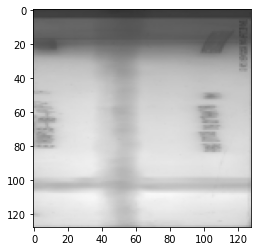

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, inclusion, valley & worm hole/3023 - E1KAPS + E2KAPS - P2 - BS - 03.09.2021.dcm.png')
print(time.time() - t)

Film mark & inclusion
1.3602135181427002


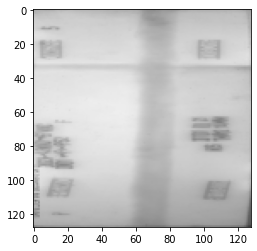

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, porosities & piping/3023 - A3KKC + E1KKC - P52 - DK 01 - P - 30.09.2021.dcm.png')
print(time.time() - t)

LOF, porosities & surface mark
1.4030423164367676


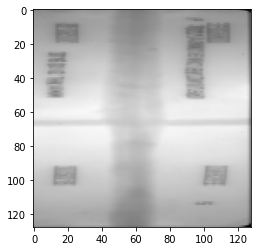

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, porosities & surface mark/3022 - A3KKC + E1KKC - S 80 - DK10 - EB - 16.02.2020_Sunday.dcm.png')
print(time.time() - t)

LOF, porosities & worm holes
1.389521837234497


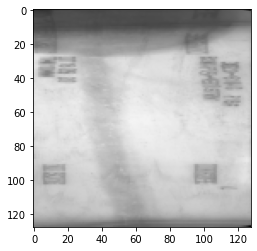

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, porosities & worm holes/3022 - B1KAC + B2KAPS - P15 - Strn I - P - 18.09.2020.dcm.png')
print(time.time() - t)

LOF & inclusion
1.426051139831543


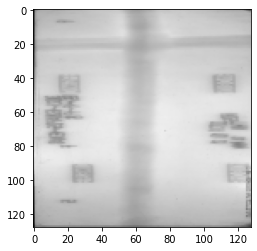

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, porosity & valley/3023 - E2KAPS + E3KAC - P16 - BS - P - 31.10.2021.dcm.png')
print(time.time() - t)

LOF, porosity, surface mark, valley
1.783454179763794


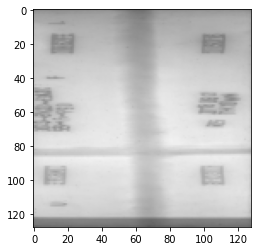

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, porosity, surface mark, valley/3023 - E1KJC + E2KJC - P50 - SS - P - 18.09.2021.dcm.png')
print(time.time() - t)

LOF, surface mark & valley
1.3846747875213623


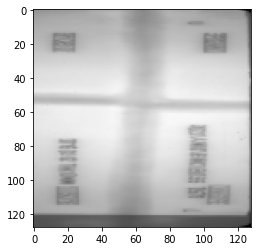

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, surface mark & valley/3022 - A3KKC + E1KKC - S 73 - SS - EB - 16.02.2020_Sunday.dcm.png')
print(time.time() - t)

LOF, surface mark, valley, blow hole
1.376190185546875


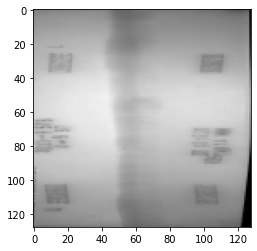

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, surface mark, valley, blow hole/3023 - FIN STAB - A - S - S7 - 12.12.2021.dcm.png')
print(time.time() - t)

LOF, valley
1.3599872589111328


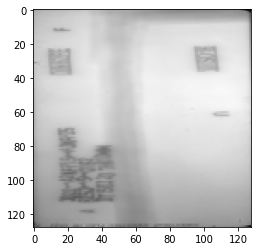

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOF, valley/3022 - A2KAPS + A2KFPS - J162 - S - BISJ - 15.03.2020.dcm.png')
print(time.time() - t)

LOP
1.2725937366485596


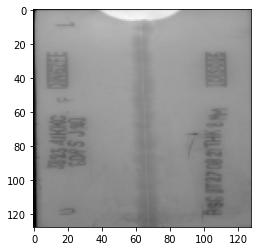

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOP/3023 - A1KKC - J140 - GDR - S - 27.08.2021.dcm.png')
print(time.time() - t)

LOP & porosities
1.2814338207244873


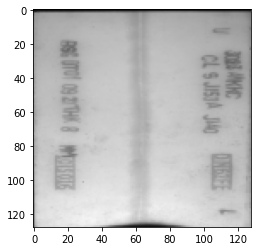

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/LOP & porosities/3023 - A1KKC - J153A - J140 - CL - S - 01.09.2021.dcm.png')
print(time.time() - t)

Linear inclusion
1.730375051498413


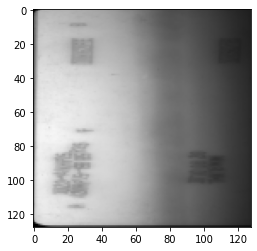

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Linear inclusion/3022 - A1KAPS + A2KAPS - P25 AB - BS - P - 10.08.2020.dcm.png')
print(time.time() - t)

Minor porosities, surafce mark, LOF
1.4022934436798096


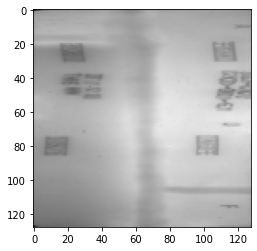

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Minor porosities, surafce mark, LOF/3022 - C1KJC + C2KJC - P34 - DK 20 - 11.12.2020.dcm.png')
print(time.time() - t)

Piping
1.42612886428833


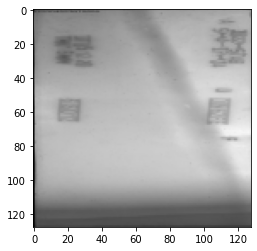

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Piping/3022 - STAB - J4 - S - A - IP - 09.12.2020.dcm.png')
print(time.time() - t)

Piping & valley
1.3979904651641846


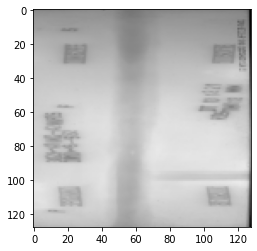

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Piping & valley/3023 - A1KKC + A2KKPS - S82 - DK10 - S - RIS - 13.12.2021.dcm.png')
print(time.time() - t)

Piping & worm hole
1.3433690071105957


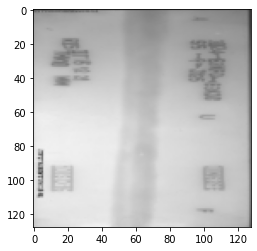

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Piping & worm hole/3023 - E3KFC + E3KJC - J125 - BISJ - P - RIS - 16.12.2021.dcm.png')
print(time.time() - t)

Piping, porosities, surface mark & valley
1.3960185050964355


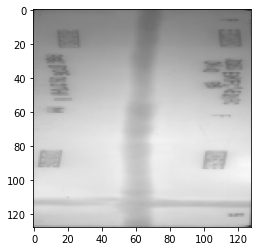

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Piping, porosities, surface mark & valley/3023 -E1KAPS + E2KAPS - P16 - DK 40 - P - 06.09.2021.dcm.png')
print(time.time() - t)

Porosities
1.7140157222747803


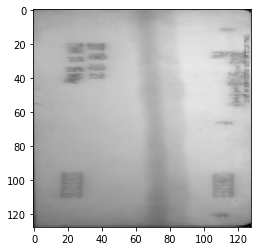

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities/3023 - FIN STAB - F - P - P4 - 18.10.2021.dcm.png')
print(time.time() - t)

Porosities & Piping
1.3915650844573975


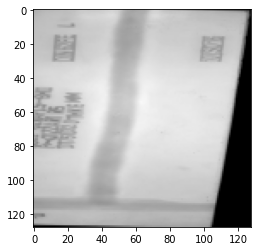

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities & Piping/3022 - B2KAPS - J122A  R1 - RS - BHD - P - 15.03.2020.dcm.png')
print(time.time() - t)

Porosities & inclusion
1.3533039093017578


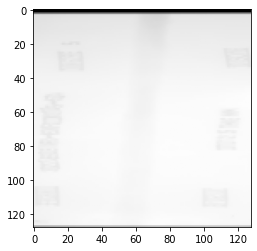

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities & inclusion/3022 - EB - E1KFC+E2KFC - S 53A - DK30 - 01.12.2019.dcm.png')
print(time.time() - t)

Porosities & valley
1.5422968864440918


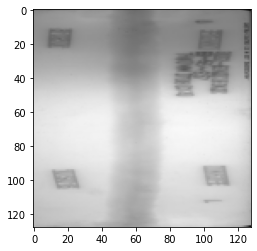

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities & valley/3022 - E2KJC + E3KJC - S 57 - SS - 08.03.2020_Sunday.dcm.png')
print(time.time() - t)

Porosities & worm hole
1.4447963237762451


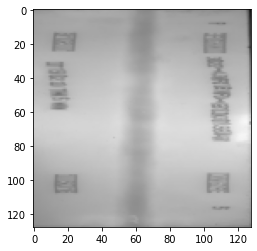

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities & worm hole/3022 - A3KFC + E1KFC - S 60A R1 - DK 30 - 19.02.2020.dcm.png')
print(time.time() - t)

Porosities, inclsion & Piping
1.3786227703094482


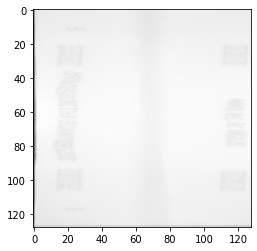

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities, inclsion & Piping/3022 - A3KFC + E1KFC - S 62 A - S 47 - DK 30 - 05.01.2020.dcm.png')
print(time.time() - t)

Porosities, inclusion & LOF
1.369722604751587


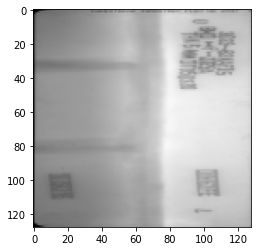

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities, inclusion & LOF/3022 - B2KAPS - J129A  - BHD - P - 05.03.2020.dcm.png')
print(time.time() - t)

Porosities, inclusion, piping & valley
1.4305737018585205


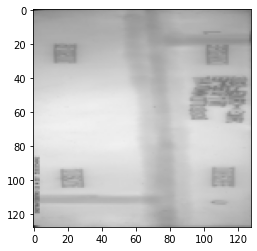

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities, inclusion, piping & valley/3022 - E2KFC + E3KFC - P 7 RT - SS - 02.03.2020.dcm.png')
print(time.time() - t)

Porosities, valley & worm hole
1.3610947132110596


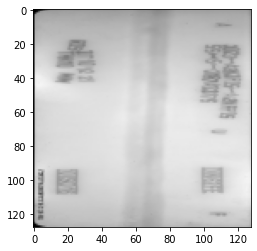

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities, valley & worm hole/3023 - A2KJPS + A2KFPS - J187A - J176 - SS - S - RIS - 10.12.2021.dcm.png')
print(time.time() - t)

Porosities, worm hole & inclusion
1.420320987701416


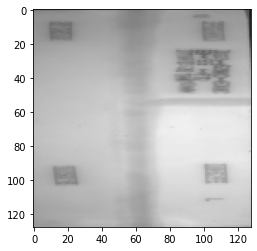

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosities, worm hole & inclusion/3022 - E2KKC + E3KKC - P 72 - SS - 08.03.2020_Sunday.dcm.png')
print(time.time() - t)

Porosity, surface mark & valley
1.451474905014038


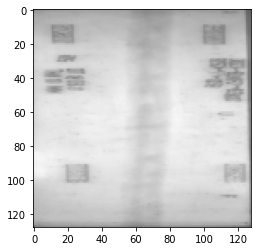

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Porosity, surface mark & valley/3023 - E2KFC + E2KJC - J98 - BISJ - P - 18.09.2021.dcm.png')
print(time.time() - t)

Surface mark, Minor inclusion
1.3140919208526611


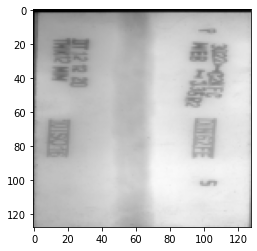

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Surface mark, Minor inclusion/3022 - G2KFC - J36 R2 X- DK 30 - P - 12.12.2020.dcm.png')
print(time.time() - t)

Surface mark, spatter, minor scattered porosities
1.4416084289550781


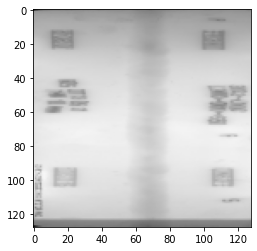

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Surface mark, spatter, minor scattered porosities/3022 - L1KKC + L2KKC - S50 - DK10 - S -13.09.2021.dcm.png')
print(time.time() - t)

Suspected defect
1.453002691268921


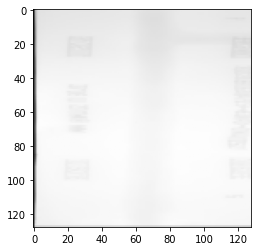

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Suspected defect/3022 - E2KAPS + E3KAC - S 21 - EB - DK40 - 06.01.2020.dcm.png')
print(time.time() - t)

Valley & worm hole
1.4180645942687988


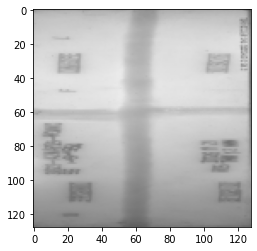

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Valley & worm hole/3023 - A2KKPS + A3KKC - S54 - SS - S - 26.11.2021.dcm.png')
print(time.time() - t)

Valley, blow holes & cluster of porosities
1.4941236972808838


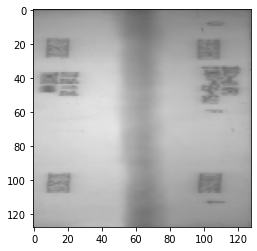

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Valley, blow holes & cluster of porosities/3022 - B1KFC + C2KAC - S42 - SS - S - 28.11.2020.dcm.png')
print(time.time() - t)

Valley, blow holes & cluster of porosities
1.5405242443084717


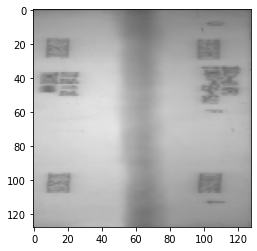

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Valley, blow holes & cluster of porosities/3022 - B1KFC + C2KAC - S42 - SS - S - 28.11.2020.dcm.png')
print(time.time() - t)

Valley, cluster of porosities & inclusion
1.36879563331604


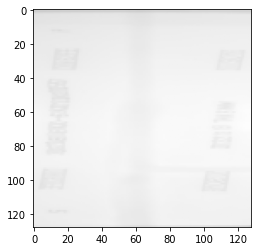

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Valley, cluster of porosities & inclusion/3022 - E1KJC + E2KJC - S 67 - EB - DK20 - 22.12.19.dcm.png')
print(time.time() - t)

LOF & porosity
1.3881468772888184


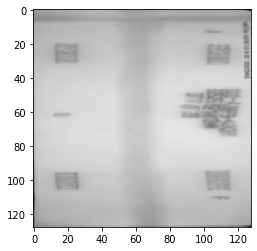

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/Valley, inclusion & Worm hole/3022 - A2KFPS + A2KJPS - J168 - S - BISJ - 16.07.2020.dcm.png')
print(time.time() - t)

blow hole, porosity & worm hole
1.401479721069336


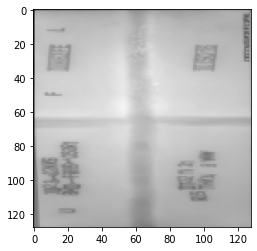

In [ ]:
t = time.time()
prediction('/content/drive/MyDrive/GRSE_CODE_AND_DATA/Data_in_png/Defects _03.01.2022_valid/blow hole, porosity & worm hole/3023 - C2KKS - J53 R1 - BHD 86 - 22.11.2021.dcm.png')
print(time.time() - t)